In [9]:
np.random.randint(0, 100, (25,2))

array([[32, 89],
       [57, 13],
       [ 8,  8],
       [39,  1],
       [59, 55],
       [29, 60],
       [33, 11],
       [73, 83],
       [64,  9],
       [78, 20],
       [25, 71],
       [31, 48],
       [59,  8],
       [45, 85],
       [30, 23],
       [76, 49],
       [74, 22],
       [39, 85],
       [59, 55],
       [35, 72],
       [ 4, 26],
       [59, 20],
       [96, 60],
       [93, 54],
       [ 3, 66]])

In [10]:
np.random.randint(0, 100, (25,1))

array([[98],
       [81],
       [13],
       [76],
       [62],
       [80],
       [92],
       [65],
       [67],
       [33],
       [80],
       [65],
       [86],
       [46],
       [43],
       [87],
       [40],
       [52],
       [13],
       [24],
       [ 3],
       [60],
       [34],
       [90],
       [93]])

In [11]:
trainData

array([[ 6., 84.],
       [90., 66.],
       [18., 97.],
       [96., 20.],
       [53., 40.],
       [83.,  7.],
       [48., 26.],
       [97., 94.],
       [83., 22.],
       [ 6., 20.],
       [ 7., 91.],
       [73.,  5.],
       [ 2., 38.],
       [72., 24.],
       [48., 31.],
       [ 3., 91.],
       [47.,  2.],
       [ 7., 75.],
       [63., 16.],
       [12., 44.],
       [83., 67.],
       [98., 78.],
       [98., 90.],
       [95., 10.],
       [ 6., 48.]], dtype=float32)

In [12]:
red

array([[97., 94.],
       [ 7., 91.],
       [73.,  5.],
       [ 2., 38.],
       [72., 24.],
       [47.,  2.],
       [ 7., 75.],
       [63., 16.],
       [98., 78.],
       [98., 90.]], dtype=float32)

In [16]:
response.ravel(order='k')

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1.], dtype=float32)

In [18]:
response

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [17]:
np.ravel(response)

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1.], dtype=float32)

In [ ]:
# 옵션 'C'
np.ravel(x, order='C') # default 값
...:
# Out: array([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# 옵션 'K'
np.ravel(x, order='K')
...:
# Out: array([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# 옵션 'F'
np.ravel(x, order='F')
...:
# Out: array([ 0, 4, 8, 1, 5, 9, 2, 6, 10, 3, 7, 11])

# 완성본

result :  [[0.]]
neighbours : [[0. 0. 0.]]
distance:  [[  1. 180. 250.]]


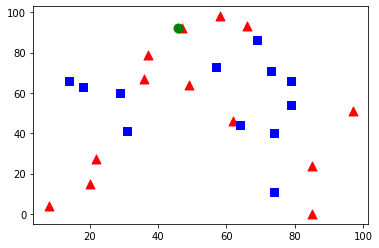

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 각 데이터의 위치: 25 X 2 크기에 각각 0 ~ 100
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)
# (ㅁ,ㅁ)가 25개로 구성된 array 만들기
# 각 데이터는 0 or 1
response = np.random.randint(0, 2, (25, 1)).astype(np.float32)
# (ㅁ,)가 25개로 구성된 array 만들기

# 값이 0인 데이터를 각각 화면 (x, y) 위치에 빨간색으로 칠합니다.
red = trainData[response.ravel() == 0] 

'''ravel은 차원을 낮춤 / 기존의 (25,1)에서 (25,)로 낮춤
이렇게 낮춘거를 0인 값을 True로 하는 masking을 맞추고 이를 traindData에 씌운 것
즉 response에서 0인 값의 index와 동일한 trainData의 값은 red로 나머지는 blue로 만듦'''

plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')
# 값이 1인 데이터를 각각 화면 (x, y) 위치에 파란색으로 칠합니다.
blue = trainData[response.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# (0 ~ 100, 0 ~ 100) 위치의 데이터를 하나 생성해 칠합니다.
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

# 여기서 red 는 0, blue 는 1임

knn = cv2.ml.KNearest_create() # 오픈cv에 있는 ml모델중 knn을 가져옴
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)
# cv2.ml.ROW_SAMPLE : 배열의 길이을 전체 길이 1로 간주한다는 것

ret, results, neighbours, dist = knn.findNearest(newcomer, 3)

# 가까운 3개를 찾고, 거리를 고려하여 자신을 정합니다.
print("result : ", results)
print("neighbours :", neighbours)
print("distance: ", dist)
plt.show()
